In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

C:\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def run_model(model, alg_name, plot_index):
    # build the model on training data
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)* 100
    conf_mat = confusion_matrix(y_test, y_pred)

    Mismatch = (y_test != y_pred)
    
    print('\n')
    print('Confusion Matrix for ' + alg_name + ':')
    print(conf_mat)
    print('\n')
    print('-------------------')
    
    
    # Compare the prediction result with ground truth
    Color_codes = np.array([[150,150,150], [203,24,29], [0, 0, 255]]) 

    # plt.figure(plot_index)
    ax = fig.add_subplot(4,2,plot_index) 
 
    # plotting all the Ductility vs Creep_Rate state-space with 's' indicating the value of damage
    ax.scatter(X_test['Ductility'], X_test['Creep_Rate'], color=Color_codes[0,:]/255.0, s = MCS_Res_Target['Damage']*200, marker='.', label='Circle = Ground truth')
    # superimposing the misclassified points
    ax.scatter(X_test['Ductility'][Mismatch], X_test['Creep_Rate'][Mismatch], color=Color_codes[1,:]/255.0, s = MCS_Res_Target['Damage'][Mismatch]*200, marker='x', label='Cross = Prediction')

#     ax.legend(loc="lower right")
#     # manually set legend color to black
#     leg = plt.gca().get_legend()
#     leg.legendHandles[0].set_color('black')
#     leg.legendHandles[1].set_color('black')
#     leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(accuracy))

In [3]:
def Compare_Classifiers(X_train, X_test, y_train, y_test):

    fig = plt.figure(figsize=(15,20))

    # ---- Decision Tree -----------
    from sklearn import tree

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
    run_model(model, "Decision Tree", 1)

    # ----- Random Forest ---------------
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=10)
    run_model(model, "Random Forest", 2)

    # ----- xgboost ------------
    # install xgboost
    # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

    from xgboost import XGBClassifier

    model = XGBClassifier()
    run_model(model, "XGBoost", 3)

    # ------ SVM Classifier ----------------
    from sklearn.svm import SVC
    model = SVC()
    run_model(model, "SVM Classifier", 4)

    # -------- Nearest Neighbors ----------
    from sklearn import neighbors
    model = neighbors.KNeighborsClassifier(n_neighbors=2)
    run_model(model, "Nearest Neighbors Classifier", 5)

    # ---------- SGD Classifier -----------------
    from sklearn.linear_model import SGDClassifier
    from sklearn.multiclass import OneVsRestClassifier

    model = OneVsRestClassifier(SGDClassifier())
    run_model(model, "SGD Classifier", 6)

    # --------- Gaussian Naive Bayes ---------
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    run_model(model, "Gaussian Naive Bayes", 7)

    # ----------- Neural network - Multi-layer Perceptron  ------------
    from sklearn.neural_network import MLPClassifier

    model = MLPClassifier()
    run_model(model, " MLP Neural network ", 8)


    fig.show()

In [12]:
col_names = ['Damage','Ductility','Creep_Rate','Zeta_P', 'A', 'S_y', 
'Alpha', 'C_f', 'Sigma_B', 'Sigma_SU', 'Sigma_RT', 'T_SU', 'T_RT', 'T_SO', 'Sigma_SO']

MCS_Res_Base = pd.read_csv('MCS_10000_Tube_29_D_LHC.csv', 
                           index_col = False, names = col_names)
MCS_Res_Target = pd.read_csv('MCS_100000_Tube_29_D_LHC.csv', 
                             index_col = False, names = col_names)

Failure_Limit = 1 # When modelling creep-fatigue damage, a value >= 1 implies failure (or more specifically the formation of a shallow crack)

# Setting what features to include 
features = ['Ductility','Creep_Rate', 'A', 'S_y', 'Alpha', 'C_f']

# Training data
Nb = len(MCS_Res_Base['Damage']) # Number of bins in the latin-hypercube
X_train = MCS_Res_Base[features]/Nb
y_train = (MCS_Res_Base['Damage'] >= Failure_Limit)
d_train = MCS_Res_Base['Damage']

# Testing data
Nb = len(MCS_Res_Target['Damage']) # Number of bins in the latin-hypercube
X_test = MCS_Res_Target[features]/Nb
y_test = (MCS_Res_Target['Damage'] >= Failure_Limit)
d_test = MCS_Res_Target['Damage'] 



Percentage of failures in training set = 0.0013%
Percentage of failures in training set = 0.00119%


# Conducting some explaratory data analysis to check that the chosen features can be useful for predicting large damages

In [ ]:
print('Percentage of failures in training set = ' + str(sum(y_train)/len(y_train)) + '%')
print('Percentage of failures in training set = ' + str(sum(y_test)/len(y_test)) + '%')

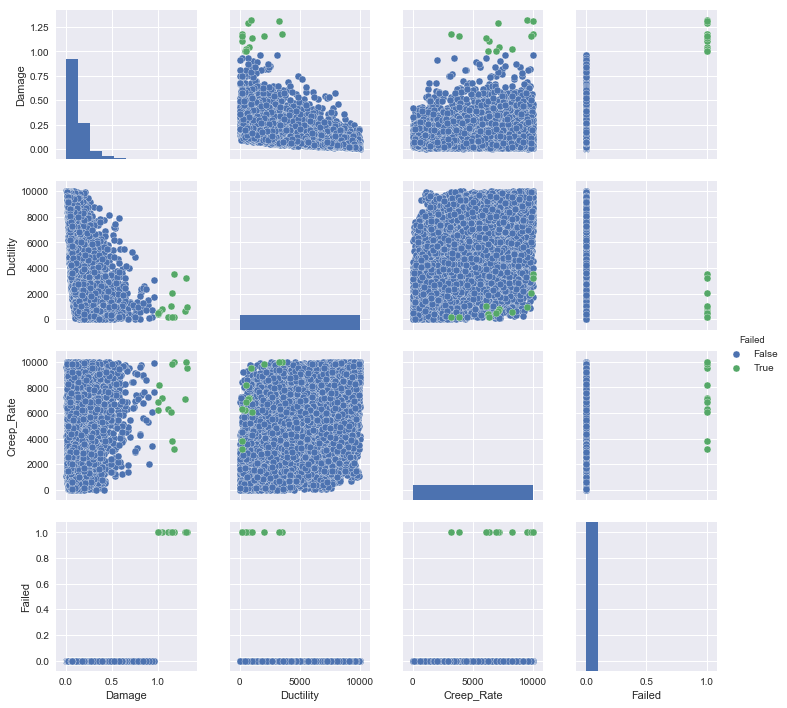

In [13]:
MCS_Res_Base['Failed'] = y_train
sns.pairplot(MCS_Res_Base[['Damage', 'Ductility','Creep_Rate', 'Failed']], hue = 'Failed')

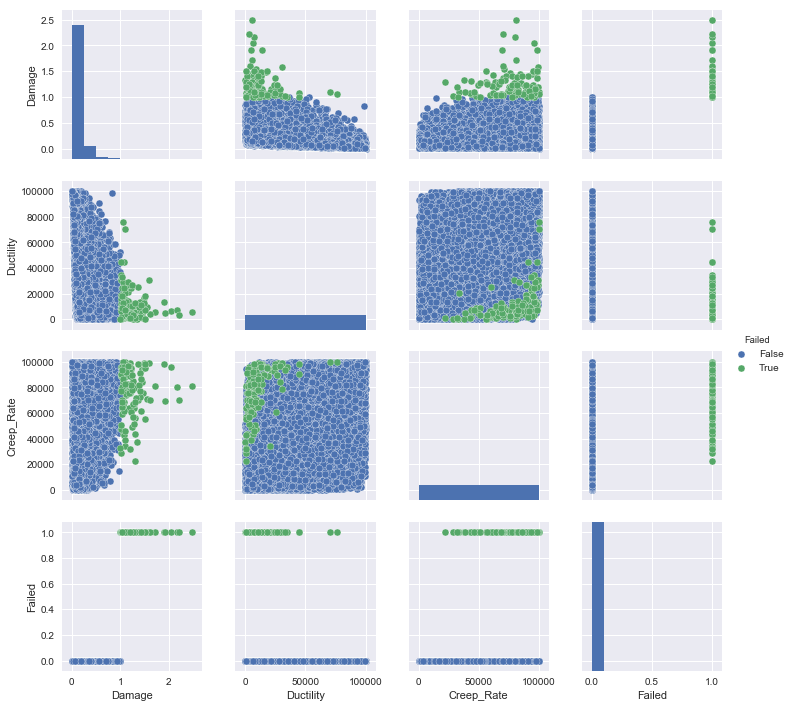

In [14]:
MCS_Res_Target['Failed'] = y_test
sns.pairplot(MCS_Res_Target[['Damage','Ductility','Creep_Rate', 'Failed']], hue = 'Failed')

C:\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


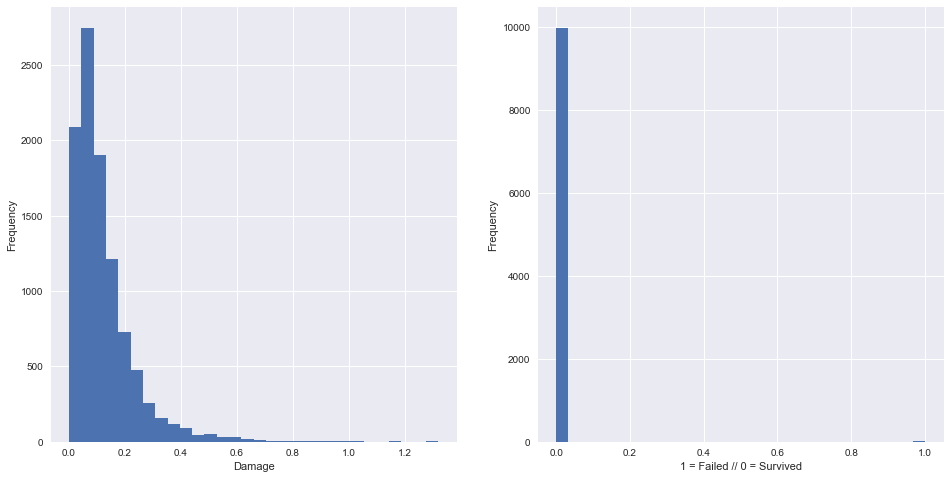

In [7]:
fig = plt.figure(figsize=(16,8))
# Histogram of the values of damage in the training data
ax = fig.add_subplot(1,2,1)
MCS_Res_Base['Damage'].hist(bins = 30)
plt.xlabel("Damage")
plt.ylabel("Frequency")
# Histogram of the number of failures (as defined by 'Failure_Limit') in the training data 
ax = fig.add_subplot(1,2,2)
y_train.hist(bins = 30)
plt.xlabel("1 = Failed // 0 = Survived")
plt.ylabel("Frequency")
fig.show()

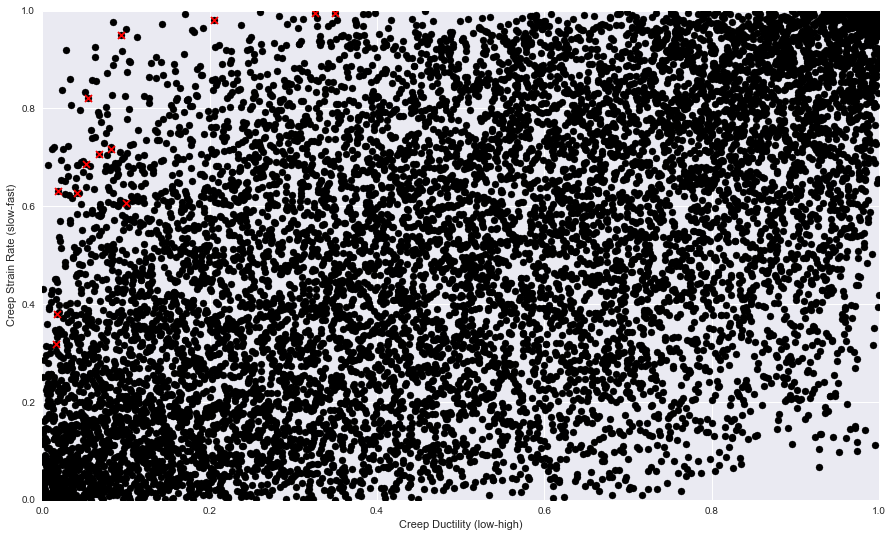

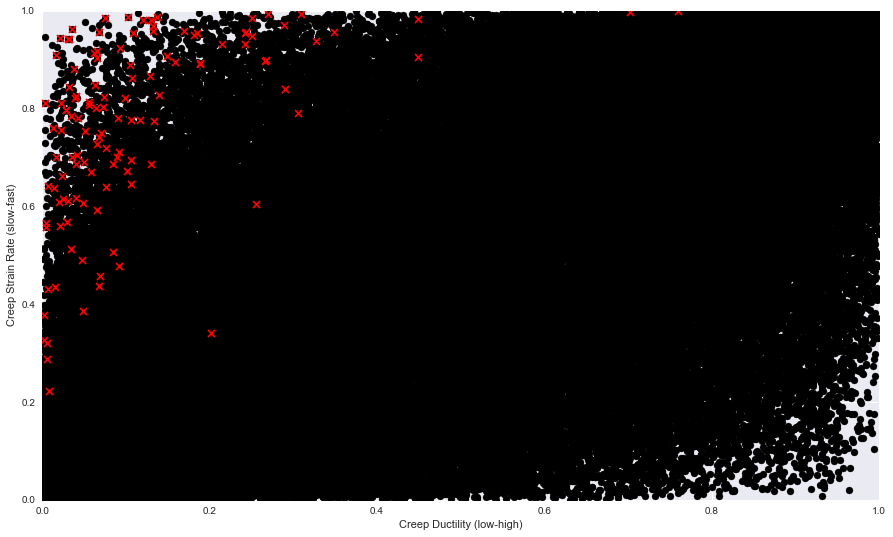

In [8]:
# Plotting the training set (the two main features and failures)

plt.figure(figsize= (15,9))
plt.scatter(X_train['Ductility'],
            X_train['Creep_Rate'],
            color = 'k')
plt.scatter(X_train['Ductility'][y_train],
            X_train['Creep_Rate'][y_train],
            color = 'r',
            marker = 'x')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Creep Ductility (low-high)')
plt.ylabel('Creep Strain Rate (slow-fast)')


# Plotting the testing set (the two main features and failures)

plt.figure(figsize= (15,9))
plt.scatter(X_test['Ductility'],
            X_test['Creep_Rate'],
            color = 'k')
plt.scatter(X_test['Ductility'][y_test],
            X_test['Creep_Rate'][y_test],
            color = 'r',
            marker = 'x')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Creep Ductility (low-high)')
plt.ylabel('Creep Strain Rate (slow-fast)')

plt.show()

# Based on the chosen features (Ductility & Creep_Rate) see if the common ML classification algorithems can help in detecting failed trials in the testing data set 

In [9]:
# Run the comparison between classifers
Compare_Classifiers(X_train, X_test, y_train, y_test)



Confusion Matrix for Decision Tree:
[[99856    25]
 [  114     5]]


-------------------


Confusion Matrix for Random Forest:
[[99880     1]
 [  119     0]]


-------------------


C:\Anaconda3\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:




Confusion Matrix for XGBoost:
[[99878     3]
 [  119     0]]


-------------------


C:\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)




Confusion Matrix for SVM Classifier:
[[99881     0]
 [  119     0]]


-------------------


Confusion Matrix for Nearest Neighbors Classifier:
[[99878     3]
 [  119     0]]


-------------------


C:\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)




Confusion Matrix for SGD Classifier:
[[99881     0]
 [  119     0]]


-------------------


Confusion Matrix for Gaussian Naive Bayes:
[[99881     0]
 [  119     0]]


-------------------


Confusion Matrix for  MLP Neural network :
[[99881     0]
 [  119     0]]


-------------------


C:\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


# Exploring whether the distance from a failed trial in the feature-space can be used as an extra feature for classification

In [10]:
def CustomClassifer(X_train, X_test, y_train, y_test, MCS_Res_Base, MCS_Res_Target):

    # Creating a meshgird of the whole 2D state-space for the two features/inputs
    # The meshgrid is configured such that the (1,1) starts at the bottom-left corner to be consistent with scatter plots

    x_g = np.arange(1, len(X_train)+1, 1)
    y_g = np.arange(len(X_train), 0, -1)
    xx_g, yy_g = np.meshgrid(x_g, y_g)

    dist = (xx_g**2 + yy_g**2)**0.5

    # Uncomment to check that xx_g and yy_g are configured correctly 
    # print(xx_g)
    # print('\n')
    # print(yy_g)
    # sns.heatmap(dist, cmap = 'magma', xticklabels=False, yticklabels=False)  
    # plt.show()

    # Retriving the locations of the failed trials
    Failed_Trials = MCS_Res_Base[features][y_train]

    # Recentre xx_g and yy_g on the location of the failed trials
    # First though, need to adjust the indicies given in Failed_Trials such that they work with the meshgrid.
    # This can be confusing between Creep_Rate is meant to be on the y_axis (which is refereced using the first index)
    # and Ductility is meant to be on the x_axis (which is refereced using the second index)

    x_ind = np.array(Failed_Trials['Ductility']-1) # the -1 is for zero indexing
    y_ind = np.array(len(MCS_Res_Base['Creep_Rate'])-Failed_Trials['Creep_Rate']) # the 1000 is to account for the flipped meshgrid

    x_train_ind = np.array(MCS_Res_Base['Ductility']-1)
    y_train_ind = np.array(len(MCS_Res_Base['Creep_Rate'])-MCS_Res_Base['Creep_Rate'])

    All_Dists = np.array([])
    All_Damages = np.array([])
    
    for i in range(0,len(Failed_Trials)): 

        x_dis = xx_g - int(Failed_Trials['Ductility'].iloc[i])
        y_dis = yy_g - int(Failed_Trials['Creep_Rate'].iloc[i])

        # Then for all points in the state-spece I Calculate the distance relative to the new centre (i.e. the failed trials)
        grid_dist = (x_dis**2 + y_dis**2)**0.5

#         # Uncomment to check that x_dis, y_dis and grid_dist are configured correctly

#         print(x_dis[:,x_ind[i]])
#         print('\n')
#         print(y_dis[y_ind[i],:])
#         sns.heatmap(grid_dist, cmap = 'magma', xticklabels=False, yticklabels=False)  
#         plt.show()
#         print(grid_dist[y_ind[i],x_ind[i]]) # Check that grid_dist is centered at the right location 

        # Now I need to calcualte the distanes relative to the new centre for the training set

        Training_Dists = np.zeros(np.shape(y_train))
        #print(Training_Dists.shape)

        for ii in range(0,len(Training_Dists)):
            Training_Dists[ii] = grid_dist[int(y_train_ind[ii]),int(x_train_ind[ii])]

        # Check: in Training_Dists the element related to this specific failed trial should 
        # be zero (by design are all distances are relative to the location of the failed trails) 
        
#        print(Training_Dists[Failed_Trials.index[i]])

        # Saving the damages and distances 

        All_Dists = np.append(All_Dists,Training_Dists)
        All_Damages = np.append(All_Damages,np.array(MCS_Res_Base['Damage']))

    return All_Dists,All_Damages


In [ ]:
All_Dists,All_Damages = CustomClassifer(X_train, X_test, y_train, y_test, MCS_Res_Base, MCS_Res_Target)

# Plotting the results
plt.figure(figsize=(10,6)) 
plt.scatter(All_Dists,All_Damages)

np.shape(All_Damages)

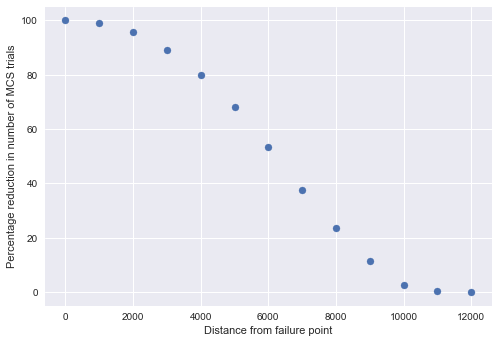

In [24]:
# The saved number of compuations can be plotted against a range of distnaces from the failed trials
Percentage_Reduction = [100*sum(All_Dists>=D)/(len(All_Damages)) for D in np.arange(0,max(All_Dists),1000)]
plt.figure()
plt.scatter(np.arange(0,max(All_Dists),1000),Percentage_Reduction)
plt.xlabel('Distance from failure point')
plt.ylabel('Percentage reduction in number of MCS trials')

Percentage reduction based on 0.8 damage cutoff = 15.7
Cut-off distance based on 0.8 damage cutoff = 8625.57429972057


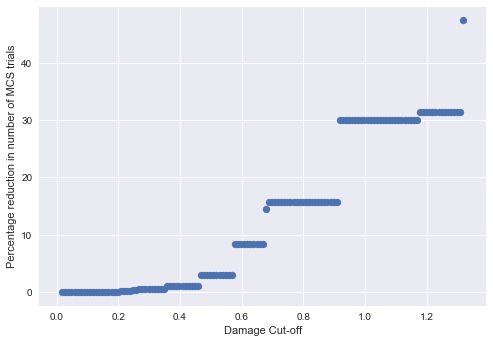

In [42]:
# Alternatively, and more usefully, could specify a minimum damage cut-off

Damage_Cutoff = 0.8
Percentage_Reduction = 100*(sum(All_Dists>=max(All_Dists[All_Damages>=Damage_Cutoff])))/(len(All_Damages))

print('Percentage reduction based on ' + str(Damage_Cutoff) + ' damage cutoff = ' + str(Percentage_Reduction))
print('Cut-off distance based on ' + str(Damage_Cutoff) + ' damage cutoff = ' + str(max(All_Dists[All_Damages>=Damage_Cutoff])))

Percentage_Reduction = [100*(sum(All_Dists>=max(All_Dists[All_Damages>=Damage_Cutoff])))/(len(All_Damages)) for Damage_Cutoff in np.arange(max(All_Damages),0.01,-0.01)]
plt.scatter(np.arange(max(All_Damages),0.01,-0.01),Percentage_Reduction)
plt.xlabel('Damage Cut-off')
plt.ylabel('Percentage reduction in number of MCS trials')
